In [2]:
import tensorflow as tf
from matplotlib.pyplot import imshow
from tensorflow.keras.utils import to_categorical

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
# Modyfikacja danych
NUM_CLASSES=10

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One hot encondig
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

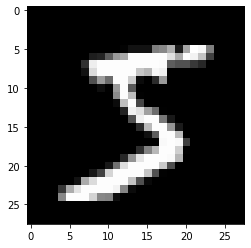

In [5]:
imshow(x_train[0], cmap="gray")

In [6]:
x_train.shape

(60000, 28, 28)

# Klasyfikator

In [7]:
from keras.layers import Input, Dense, Flatten
from keras.models import Model

klasyfikator_inputs = Input(shape=(28, 28, 1))
x = Flatten()(klasyfikator_inputs)
# x = Dense(units=200, activation='relu')(x)
# x = Dense(units=150, activation='relu')(x)
klasyfikator_output = Dense(10, activation='softmax')(x)

klasyfikator_model = Model(klasyfikator_inputs, klasyfikator_output)

2022-05-05 19:04:27.534842: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-05 19:04:27.610968: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-05 19:04:27.611137: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-05 19:04:27.612006: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [8]:
klasyfikator_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# Kompilacja

In [9]:
from tensorflow.keras.optimizers import Adam

# Optymalizator
opt = Adam(learning_rate = 0.0005)

klasyfikator_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [10]:
klasyfikator_model.fit(x_train, y_train, batch_size=32, epochs=1, shuffle=True)

1875/1875 [==============================] - 4s 1ms/step - loss: 0.5909 - accuracy: 0.8532


In [11]:
klasyfikator_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3506 - accuracy: 0.9075


[0.35060545802116394, 0.9075000286102295]

In [12]:
import numpy as np

CLASSES = np.array(['zero', 'jeden', 'dwa', 'trzy', 'cztery', '5', '6', '7'
                    , '8', '9'])
preds = klasyfikator_model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis= -1)]
actual_single = CLASSES[np.argmax(y_test, axis= -1)]

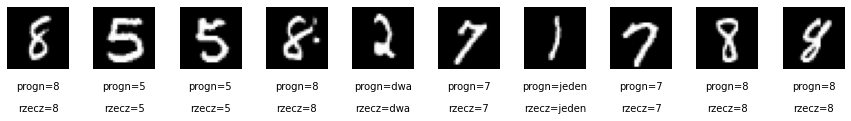

In [13]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'progn=' + str(preds_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'rzecz=' + str(actual_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes)
    ax.imshow(img, cmap='gray')